# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Design and build a simulation environment that models sensor inputs, actuator effects, and performance measurement.
* Apply core AI concepts by implementing the agent function for a simple and model-based reflex agents that respond to environmental percepts.
* Practice how the environment and the agent function interact.
* Analyze agent performance through controlled experiments across different environment configurations.
* Graduate Students: Develop strategies for handling uncertainty and imperfect information in autonomous agent systems.

## Instructions

Total Points: Undergrads 98 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### AI Use

Here are some guidelines that will make it easier for you:

* __Don't:__ Rely on AI auto completion. You will waste a lot of time trying to figure out how the suggested code relates to what we do in class. Turn off AI code completion (e.g., Copilot) in your IDE.
* __Don't:__ Do not submit code/text that you do not understand or have not checked to make sure that it is complete and correct.
* __Do:__ Use AI for debugging and letting it explain code and concepts from class.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [87]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [88]:
# %jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [70]:
# make sure numpy is installed
%pip install -q numpy

In [71]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [72]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

np.str_('south')

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [73]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [74]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: east
step 2 - action: west
step 3 - action: west
step 4 - action: west
step 5 - action: north
step 6 - action: suck
step 7 - action: east
step 8 - action: east
step 9 - action: south
step 10 - action: suck
step 11 - action: south
step 12 - action: suck
step 13 - action: south
step 14 - action: east
step 15 - action: suck
step 16 - action: west
step 17 - action: suck
step 18 - action: east
step 19 - action: south


5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [75]:
# Your code and description goes here
import random

def create_environment(n,p_dirty=0.2,seed=None):
  if seed is not None:
    random.seed(seed)
    np.random.seed(seed)
  # Khởi tạo môi trường cho robot với 1 là có rác và 0 là không có rác
  environment = np.random.choice([0,1],size=(n,n),p=[1-p_dirty,p_dirty])
  # Khởi tạo vị trí bắt đầu của robot
  agent_pos = [random.randint(0,n-1),random.randint(0,n-1)]
  return environment, agent_pos

actions = ["north", "east", "west", "south", "suck"]
def get_bumpers(x,y,n):
  bumpers = {"north" : bool(x == 0), # bắc
             "south" : bool(x == n-1), # nam
             "west" : bool(y == 0), # tây
             "east" : bool(y == n-1)} # đông
  return bumpers

def get_dirty(x,y,room):
  return bool(room[x,y])

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)



def run_environment_for_task1(agent_function, max_steps, room, position, verbose=True):
  # p = .2 --->  xác xuất 20%
  # n = 5 ---> kích thước 5x5
  x,y = position
  num_cleaned = 0
  for i in range(max_steps):
        bumpers = get_bumpers(x,y,room.shape[0])
        dirty = get_dirty(x,y,room)
        action = agent_function(bumpers, dirty)

        if np.sum(room) == 0:  # không còn ô bẩn nào
          # if verbose: print("All clean at step", i)
          break

        if (verbose):
          # print("step", i , "- action:", action)
          pass
        if action == "north" and not bumpers["north"]:
          x -= 1
        elif action == "south" and not bumpers["south"]:
          x += 1
        elif action == "west" and not bumpers["west"]:
          y -= 1
        elif action == "east" and not bumpers["east"]:
          y += 1
        elif action == "suck":
          if room[x,y] == 1:
            room[x,y] = 0
            num_cleaned += 1
  # print("Final room:\n", room)
  return {"steps": i+1, "cleaned": num_cleaned, "dirty_left": int(np.sum(room))}


Show that your environment works with the simple randomized agent from above.

In [76]:
# Your code and description goes here
room, pos = create_environment(5)
n_steps = 100
run_environment_for_task1(simple_randomized_agent, n_steps, room, pos)

{'steps': 100, 'cleaned': 3, 'dirty_left': 2}

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [77]:
# Your code and description goes here
import random

def step_environment(environment,agent_pos,action,verbose=True):
    # Thực thi hành động của robot trong môi trường.
    # Trả về vị trí mới và số ô bẩn đã được làm sạch (nếu có).
    environment.shape[0]
    n = len(environment)
    cleaned = 0
    if action == "suck":
      if environment[agent_pos[0],agent_pos[1]] == 1:
        environment[agent_pos[0],agent_pos[1]] = 0
        cleaned = 1
    elif action == "up":
      if agent_pos[0] > 0:                                                                             # Hàm thực thi hành động ở task 1
        agent_pos[0] -= 1
    elif action == "down":
      if agent_pos[0] < n-1:
        agent_pos[0] += 1
    elif action == "left":
      if agent_pos[1] > 0:
        agent_pos[1] -= 1
    elif action == "right":
      if agent_pos[1] < n-1:
        agent_pos[1] += 1
    return environment, agent_pos, cleaned

def render(environment, agent_pos):                                                                    # Hàm hiển thị môi trường (sử dụng hay không tùy sở thích)
    env_copy = environment.copy()
    env_copy[agent_pos[0], agent_pos[1]] = 9   # dùng số 9 để biểu thị agent
    print(env_copy, "\n")

def run_environment_for_task2(agent_func,environment,agent_pos,n,p_dirty=0.2, max_steps = 100,seed=None,verbose=True):
  total_cleaned = 0
  steps = 0
  while steps < max_steps:

    dirty = (environment[agent_pos[0],agent_pos[1]] == 1)
    bumpers = get_bumper(agent_pos,n)
    state = {
        "bumpers": bumpers,
        "dirty": dirty,
        "actions": actions
    }                                                                                                                                   # Hàm chạy này ở task 1 nốt
    action = agent_func(state)
    environment, agent_pos, cleaned = step_environment(environment,agent_pos,action)
    total_cleaned += cleaned
    steps += 1
    if verbose:
      # print(f"Step {steps}, Action: {action}, Cleaned: {cleaned}")
      # render(environment, agent_pos)
      pass

    # Nếu không còn ô bẩn thì dừng
    if np.sum(environment) == 0:
      break
  return {
        "steps": steps,
        "cleaned": total_cleaned,
        "dirty_left": int(np.sum(environment))
    }

def get_bumper(agent_pos,n):
  bumpers = {
    "up": agent_pos[0] == 0,
    "down": agent_pos[0] == n - 1,
    "left":  agent_pos[1] == 0,
    "right":  agent_pos[1] == n - 1
  }
  return bumpers

def simple_reflex_agent(state):
  """
    Simple Reflex Agent:
    - Nếu ô hiện tại bẩn -> hút bụi
    - Nếu sạch -> di chuyển ngẫu nhiên, nhưng tránh hướng có tường
  """
  if state["dirty"]:                              # Nếu ở ô bẩn thì quét rác
    return "suck"
  else:
    possible_actions = []
    for action, blocked in state["bumpers"].items():                 # Duyệt biến bumpers trong state
      if not blocked:                                                # Nếu nó không bị chặn thì thêm hướng di chuyển đó vào possible_action
        possible_actions.append(action)
    return random.choice(possible_actions)

Show how the agent works with your environment.

In [78]:
# Your code and description goes here
n = 5
environment, agent_pos = create_environment(n)
run_environment_for_task2(simple_reflex_agent,environment,agent_pos,n)

{'steps': 57, 'cleaned': 2, 'dirty_left': 0}

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [79]:
# Your short description of the state and your implementation goes here
def zig_zag_plan(state,visited, n=5):
    plan = []
    dx, dy = state["cur_pos"]
    if dx < n//2:
      for i in range(dx, n):
          if i % 2 == 0:                     # Hàng chẵn đi từ trái sang phải
              if i == dx:
                  rng = range(dy, n)
              else:
                  rng = range(n)
              for j in rng:
                  plan.append([i, j])
          else:                              # Hàng lẻ đi từ phải sang trái
              if i == dx:
                  rng = range(dy, -1, -1)
              else:
                  rng = range(n-1, -1, -1)
              for j in rng:
                  plan.append([i, j])

    else:
      for i in range(dx, -1,-1):
          if i % 2 == 0:                     # Hàng chẵn đi từ trái sang phải
              if i == dx:
                  rng = range(dy, n)
              else:
                  rng = range(n)
              for j in rng:
                  plan.append([i, j])
          else:                              # Hàng lẻ đi từ phải sang trái
              if i == dx:
                  rng = range(dy, -1, -1)
              else:
                  rng = range(n-1, -1, -1)
              for j in rng:
                  plan.append([i, j])
    if dy == n - 1 :
      x, y = plan[-1]
      if dx < n // 2:
        if (x+1,y) not in visited and x < n:
          plan.append([x+1,y])
        else:
          plan.append([x-1,y])
      else:
        if (x-1,y) not in visited and x >= 0:
          plan.append([x-1,y])
        else:
          plan.append([x+1,y])
    if dy == n-1 and dx == 0:
      rng = range(1,n)
      for i in rng:
        plan.append([i,dy])
    elif dy == 0 and dx == n-1:
      rng = reversed(range(n-1))
      for i in rng:
        plan.append([i,dy])
    return plan


def zig_zag_agent(state, n = 5):
  direction = ""
  if state["cur_pos"] not in state["visited"]:
    state["visited"].append([state["cur_pos"][0],state["cur_pos"][1]])
  # bỏ vị trí hiện tại ra khỏi plan nếu trùng
  if state["plan"] and state["cur_pos"] == state["plan"][0]:
    state["plan"].pop(0)
  if state["dirty"]:
    return "suck", state["plan"], state["visited"]

  # nếu còn plan -> di chuyển theo hướng tiếp theo

  if state["plan"]:

      x, y = state["plan"][0]
      dx, dy = x - state["cur_pos"][0], y - state["cur_pos"][1]
      if dx < 0: direction = "up"
      if dx > 0: direction = "down"
      if dy > 0: direction = "right"
      if dy < 0: direction = "left"

  # nếu hết plan -> đứng yên
  plan = state["plan"]
  return direction,plan,state["visited"]


def run_environment_for_task3(agent_func,environment,agent_pos,n,p_dirty=0.2, max_steps = 100,seed=None,verbose=True):
  total_cleaned = 0
  steps = 0
  visited = []
  plan = []
  # print("agent position: ", agent_pos)
  while steps < max_steps:
    if plan == [] or agent_pos not in plan:
      new_plan = zig_zag_plan({"cur_pos": agent_pos},visited, n)
      plan = new_plan
    dirty = (environment[agent_pos[0],agent_pos[1]] == 1)
    bumpers = get_bumper(agent_pos,n)
    state = {
        "bumpers": bumpers,
        "dirty": dirty,
        "actions": actions,
        "cur_pos": agent_pos,          # Vị trí hiện tại
        "visited": visited,            # Tập hợp các ô đã đi qua
        "room_size": n,                # Kích thước môi trường
        "plan": plan                   # Danh sách hành động của agent
    }

    action, new_plan, new_visited = zig_zag_agent(state)
    # print("Visit: ",visited)
    visited = new_visited
    # print("Cur:", state["cur_pos"], "Plan:", state["plan"])
    plan = new_plan
    environment, agent_pos, cleaned = step_environment(environment,agent_pos,action)
    total_cleaned += cleaned
    steps += 1
    if verbose:
      # print(f"Step {steps}, Action: {action}, Cleaned: {cleaned}")
      # render(environment, agent_pos)
      pass

    # Nếu không còn ô bẩn thì dừng
    if np.sum(environment) == 0:
      break
  return {
        "steps": steps,
        "cleaned": total_cleaned,
        "dirty_left": int(np.sum(environment)),
        # "visited": state["visited"],
        # "plan": state["plan"]
    }

In [80]:
# Your code goes here
environment, agent_pos = create_environment(n)
# render(environment, agent_pos)
run_environment_for_task3(zig_zag_agent,environment,agent_pos,n)

{'steps': 22, 'cleaned': 2, 'dirty_left': 0}

Show how the agent works with your environment.

In [81]:
# Your code goes here

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [82]:
# Your code goes here
import matplotlib.pyplot as plt
import pandas as pd
import time

room5, pos5 = create_environment(5)
room10, pos10 = create_environment(10)
room100, pos100 = create_environment(100)
epochs = 100
List_Agents = {
    "Randomized Agent": simple_randomized_agent,
    "Simple Reflex Agent": simple_reflex_agent,
    "Model-based Reflex Agent": zig_zag_agent
}
list_rooms = ["5x5", "10x10", "100x100"]
list_environments = {
    "5x5": [room5, pos5],
    "10x10": [room10, pos10],
    "100x100": [room100, pos100]
}

def run_agents(name_agent, agent, room, position):
  results = {}
  if name_agent == "Randomized Agent":
    results["Randomized Agent"] = run_environment_for_task1(agent, epochs, room, position)
  if name_agent == "Simple Reflex Agent":
    results["Simple Reflex Agent"] = run_environment_for_task2(agent, room, position, room.shape[0])
  if name_agent == "Model-based Reflex Agent":
    results["Model-based Reflex Agent"] = run_environment_for_task3(agent, room, position, room.shape[0])
  return results

def evaluate_agents(list_agents, list_environments, epochs):
  results = {}
  for name_enviroment, environment in list_environments.items():
    temp_rs = {}
    for name_agent, agent in list_agents.items():
      room_temp = environment[0].copy()  # numpy array copy
      pos_temp = environment[1][:]
      temp_rs[name_agent] = run_agents(name_agent, agent, room_temp, pos_temp)
    results[name_enviroment] = temp_rs
  return results

def show_table(results, list_rooms):
    table = []
    for size in list_rooms:
        row = {"Size": size}
        for agent_name, metrics in results[size].items():
            metrics = list(metrics.values())[0]
            row[agent_name] = f"steps={metrics['steps']}, cleaned={metrics['cleaned']}, dirty_left={metrics['dirty_left']}"
        table.append(row)
    df = pd.DataFrame(table)
    return df


results = evaluate_agents(List_Agents, list_environments, epochs)
df = show_table(results, list_rooms)
df

,Size,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
0,5x5,"steps=100, cleaned=2, dirty_left=4","steps=100, cleaned=2, dirty_left=4","steps=74, cleaned=6, dirty_left=0"
1,10x10,"steps=100, cleaned=2, dirty_left=12","steps=100, cleaned=0, dirty_left=14","steps=100, cleaned=7, dirty_left=7"
2,100x100,"steps=100, cleaned=1, dirty_left=2028","steps=100, cleaned=2, dirty_left=2027","steps=100, cleaned=20, dirty_left=2009"


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

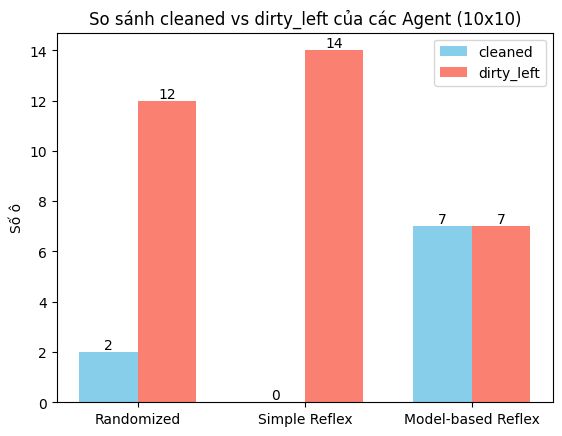

In [83]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt

def select_size(results, size = "5x5"):
  rs_Randomized_Agent = results[size]["Randomized Agent"]["Randomized Agent"]
  rs_Simple_Reflex_Agent = results[size]["Simple Reflex Agent"]["Simple Reflex Agent"]
  rs_Model_based_Reflex_Agent = results[size]["Model-based Reflex Agent"]["Model-based Reflex Agent"]
  agents = ["Randomized", "Simple Reflex", "Model-based Reflex"]
  steps_data = [rs_Randomized_Agent["steps"], rs_Simple_Reflex_Agent["steps"], rs_Model_based_Reflex_Agent["steps"]]
  cleaned_data = [rs_Randomized_Agent["cleaned"], rs_Simple_Reflex_Agent["cleaned"], rs_Model_based_Reflex_Agent["cleaned"]]
  dirty_left_data = [rs_Randomized_Agent["dirty_left"], rs_Simple_Reflex_Agent["dirty_left"], rs_Model_based_Reflex_Agent["dirty_left"]]
  return agents, steps_data, cleaned_data, dirty_left_data


def plot_results_bar(agents, steps_data, cleaned_data, dirty_left_data, size):
  x = np.arange(len(agents))
  width = 0.35  # độ rộng cột
  plt.bar(x - width/2, cleaned_data, width, label='cleaned', color='skyblue')
  plt.bar(x + width/2, dirty_left_data, width, label='dirty_left', color='salmon')
  plt.xticks(x, agents)
  plt.ylabel("Số ô")
  plt.title(f"So sánh cleaned vs dirty_left của các Agent ({size})")
  plt.legend()
  for xi, val in zip(x - width/2, cleaned_data):
      plt.text(xi, val + 0.1, str(val), ha='center')
  for xi, val in zip(x + width/2, dirty_left_data):
      plt.text(xi, val + 0.1, str(val), ha='center')
  plt.show()
size_room = "10x10" # "5x5" | "10x10" | "100x100"
agents, steps_data, cleaned_data, dirty_left_data = select_size(results, size_room)
plot_results_bar(agents, steps_data, cleaned_data, dirty_left_data, size_room)

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [84]:
# Answers goes here

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [85]:
# Your code and discussion goes here

## More Advanced Implementation (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [86]:
# Your ideas/code